<a href="https://colab.research.google.com/github/robinrb7/TransferLearning_FeatureTuning/blob/main/Tranfer_Learning__Fine_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

zip_ref= zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2025-01-08 17:00:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.175.207, 74.125.24.207, 142.251.10.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.175.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  22.5MB/s    in 8.1s    

2025-01-08 17:00:48 (19.8 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [3]:
import datetime
import tensorflow as tf

def create_tensorboard_callback(dir_name, exp_name):
  log_dir = dir_name + "/" + exp_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tesnsorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving tensorborad log files to : {log_dir}")
  return tesnsorboard_callback

In [4]:
import os

for dirpath,dirnames,filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories in {len(filenames)} images in '{dirpath}' .")

There are 2 directories in 0 images in '10_food_classes_10_percent' .
There are 10 directories in 0 images in '10_food_classes_10_percent/train' .
There are 0 directories in 75 images in '10_food_classes_10_percent/train/grilled_salmon' .
There are 0 directories in 75 images in '10_food_classes_10_percent/train/chicken_wings' .
There are 0 directories in 75 images in '10_food_classes_10_percent/train/chicken_curry' .
There are 0 directories in 75 images in '10_food_classes_10_percent/train/fried_rice' .
There are 0 directories in 75 images in '10_food_classes_10_percent/train/steak' .
There are 0 directories in 75 images in '10_food_classes_10_percent/train/ice_cream' .
There are 0 directories in 75 images in '10_food_classes_10_percent/train/sushi' .
There are 0 directories in 75 images in '10_food_classes_10_percent/train/hamburger' .
There are 0 directories in 75 images in '10_food_classes_10_percent/train/pizza' .
There are 0 directories in 75 images in '10_food_classes_10_percent/

In [5]:
train_dir = '10_food_classes_10_percent/train/'
test_dir = '10_food_classes_10_percent/test/'

In [6]:
import tensorflow as tf

train_data = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                 image_size = (224,224),
                                                                 label_mode="categorical",
                                                                 batch_size=32)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                image_size=(224,224),
                                                                label_mode="categorical",
                                                                batch_size =32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [14]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

base_model.trainalble = False

inputs = tf.keras.layers.Input(shape = (224,224,3),name="input_layer")
x= base_model(inputs)
print(f"shape after passing input into base model : {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"shape after global average poooling layer : {x.shape}")

outputs = tf.keras.layers.Dense(10,activation = "softmax", name="output_layer")(x)

model_0 = tf.keras.Model(inputs,outputs)



24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
shape after passing input into base model : (None, 7, 7, 1280)
shape after global average poooling layer : (None, 1280)


In [15]:
model_0.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [16]:
history_0 = model_0.fit(train_data,
                        epochs=5,
                        steps_per_epoch= len(train_data),
                        validation_data = test_data,
                        validation_steps = int(0.25 * len(test_data)),
                        callbacks = [create_tensorboard_callback(dir_name="transfer_learning",
                                                                 exp_name="10_percent_featureExtraction")])

Saving tensorborad log files to : transfer_learning/10_percent_featureExtraction/20250108-171002
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 149s 3s/step - accuracy: 0.4146 - loss: 1.8243 - val_accuracy: 0.7730 - val_loss: 0.7478
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7928 - val_loss: 0.7307
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 34s 187ms/step - accuracy: 0.8742 - loss: 0.4515 - val_accuracy: 0.7632 - val_loss: 0.6688
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7780 - val_loss: 0.6541
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 425ms/step - accuracy: 0.9550 - loss: 0.1683 - val_accuracy: 0.8676 - val_loss: 0.4430


In [17]:
model_0.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.8003 - loss: 0.6700


[0.6719297766685486, 0.798799991607666]

In [19]:
base_model.summary()

Model: "efficientnetv2-b0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, None, None, 3)  │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_2 (Rescaling)   │ (None, None, None, 3)  │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_1           │ (None, None, None, 3)  │              0 │ rescaling_2[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, None, None, 32) │            864 │ normalization_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, None, None, 32) │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, None, None, 32) │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_conv      │ (None, None, None, 16) │          4,608 │ stem_activation[0][0]  │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_bn        │ (None, None, None, 16) │             64 │ block1a_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_activati… │ (None, None, None, 16) │              0 │ block1a_project_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_conv       │ (None, None, None, 64) │          9,216 │ block1a_project_activ… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_bn         │ (None, None, None, 64) │            256 │ block2a_expand_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_activation │ (None, None, None, 64) │              0 │ block2a_expand_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_project_conv      │ (None, None, None, 32) │          2,048 │ block2a_expand_activa… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_project_bn        │ (None, None, None, 32) │            128 │ block2a_project_conv[… │
│ (BatchNormalization) 

 Total params: 5,919,312 (22.58 MB)

 Trainable params: 5,858,704 (22.35 MB)

 Non-trainable params: 60,608 (236.75 KB)

In [20]:
model_0.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-b0 (Functional)       │ (None, 7, 7, 1280)          │       5,919,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling_layer         │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │          12,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,675,152 (67.43 MB)

 Trainable params: 5,871,514 (22.40 MB)

 Non-trainable params: 60,608 (236.75 KB)

 Optimizer params: 11,743,030 (44.80 MB)

In [22]:
import matplotlib.pyplot as plt

In [23]:
def plot_loss_curves(history):

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  loss =history.history["loss"]
  val_loss = history.history["val_loss"]

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();

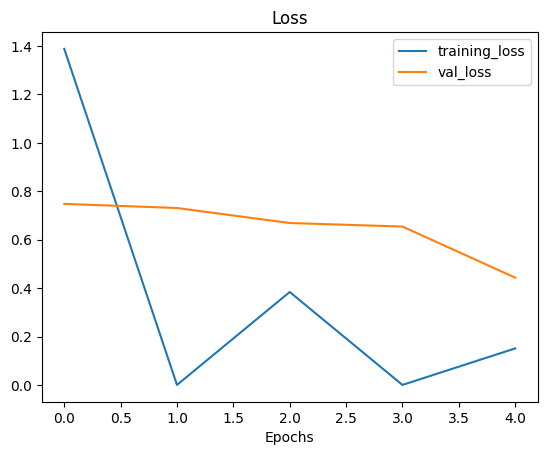

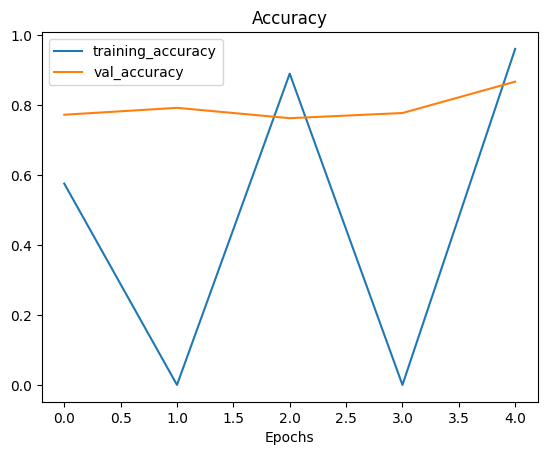

In [24]:
plot_loss_curves(history_0)